<a href="https://colab.research.google.com/github/LQMinh528/AI/blob/main/W7_Machine_Learning_lung_cancer_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#lung_cancer_examples
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import numpy as np

url = 'lung_cancer_examples.csv'
data = pd.read_csv(url)
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


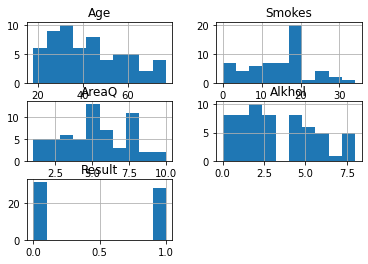

In [2]:
data.hist()
plt.show()

In [3]:
correlation=data.corr()
print(correlation)

             Age    Smokes     AreaQ    Alkhol    Result
Age     1.000000  0.053665 -0.268957  0.318621  0.637726
Smokes  0.053665  1.000000 -0.353295  0.469915  0.373444
AreaQ  -0.268957 -0.353295  1.000000 -0.714412 -0.746621
Alkhol  0.318621  0.469915 -0.714412  1.000000  0.810439
Result  0.637726  0.373444 -0.746621  0.810439  1.000000


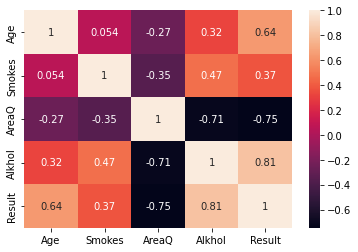

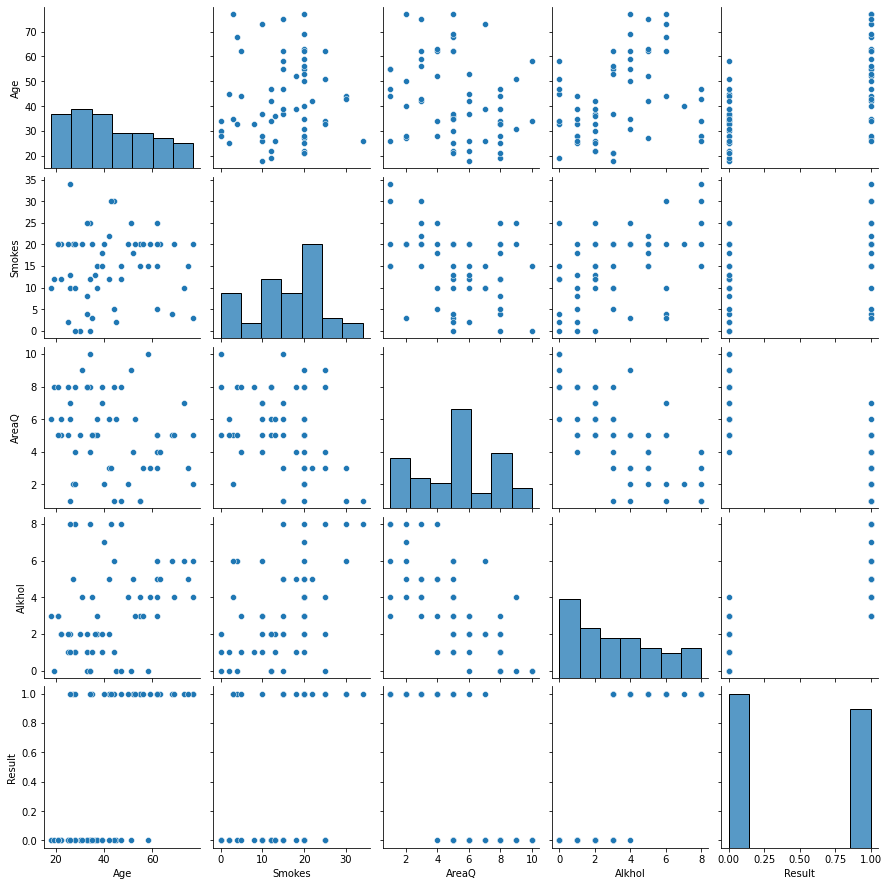

In [4]:
sns.heatmap(correlation, annot=True)
sns.pairplot(data)

In [19]:
model = linear_model.LinearRegression()
X = pd.DataFrame([data['Alkhol'], data['Alkhol']**2, data['Alkhol']**3, data['Alkhol']**4, data['Alkhol']**5, data['Alkhol']**6, data['Alkhol']**7, data['Alkhol']**8]).T
model.fit(X, y = data['Result'])
print('Intercept của mô hình là: ', model.intercept_)
print('Coefficent của mô hình là: ', model.coef_)
print('Độ chính xác của mô hình là: ', model.score(X,y = data['Result']))

Intercept của mô hình là:  8.649911342750727e-10
Coefficent của mô hình là:  [ 1.57202381e+00 -3.37968750e+00  2.59861111e+00 -9.70876736e-01
  2.02777778e-01 -2.43923611e-02  1.58730159e-03 -4.34027778e-05]
Độ chính xác của mô hình là:  0.8045794930875576


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


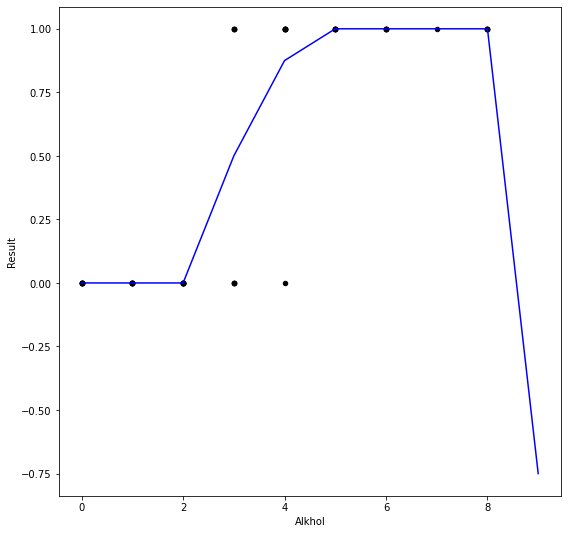

In [21]:
range = np.arange(0,10,1)
X_range = pd.DataFrame([range, range**2, range**3, range**4, range**5, range**6, range**7, range**8]).T
y_predict = model.predict(X=X_range)
data.plot(kind = 'scatter', x = 'Alkhol', y = 'Result', figsize = (9,9), color ='black')
plt.plot(range, y_predict, color = 'blue')